## Import Library

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


Sekarang kita memiliki lists x dan x_with_nan. Keduanya hampir sama, dengan perbedaan bahwa x_with_nan berisi nilai nan. Penting untuk memahami behavior statistik Python ketika mereka menemukan nilai not-a-number (nan). Dalam data science, missing values adalah hal biasa, dan kita akan sering menggantinya dengan nan.

Sekarang, buat objek np.ndarray dan pd.Series yang sesuai dengan x dan x_with_nan:

In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measures of Central Tendency

### Mean

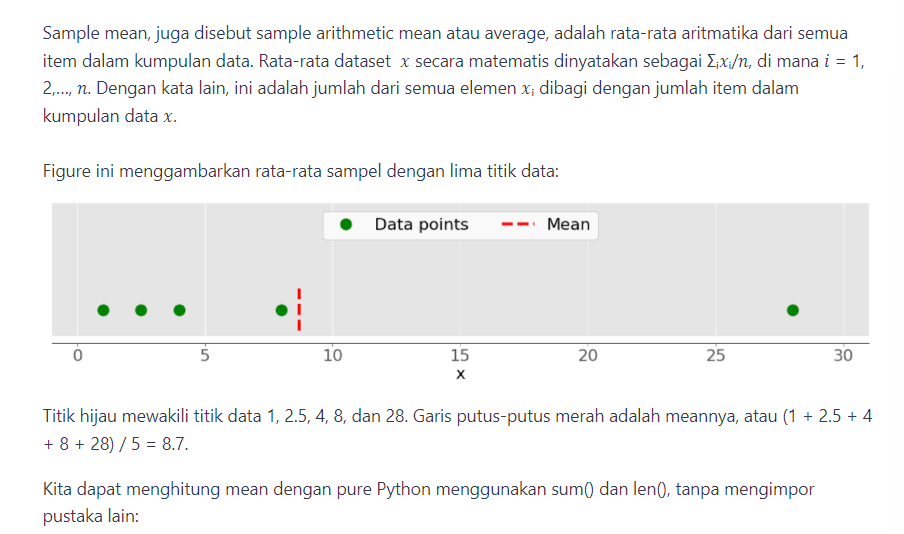

In [4]:
mean_ = sum(x) / len(x)
mean_

8.7

Meskipun kode diatas clean dan elegan, Anda juga dapat menerapkan fungsi statistics built-in Python:

In [5]:
mean_ = statistics.mean(x)
print(mean_)

8.7


In [6]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


Hasil ini konsisten dengan behavior sum(), karena sum(x_with_nan) juga mengembalikan nan.

Jika kita menggunakan NumPy, maka kita bisa mendapatkan mean dengan np.mean():

In [7]:
mean_ = np.mean(y)
mean_

8.7

Fungsi mean() dan method .mean() dari NumPy mengembalikan hasil yang sama seperti statistics.mean(). Dibawah ini adalah kasus ketika ada nilai nan di antara data kita:

In [8]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


Jika kalian lebih suka mengabaikan nilai nan, kalian dapat menggunakan np.nanmean ():

In [9]:
np.nanmean(y_with_nan)

8.7

nanmean() mengabaikan semua nilai nan. nanmean() mengembalikan nilai yang sama seperti mean() jika kalian menerapkannya ke kumpulan data tanpa nilai nan.

pd.Series objects juga mempunyai method .mean():

In [10]:
mean_ = z.mean()
mean_

8.7

Seperti yang kalian lihat, .mean() digunakan dengan cara yang sama seperti dalam kasus NumPy. Namun, .mean() dari Pandas mengabaikan nilai nan secara default:

### Weighted Mean

Weighted mean sangat berguna saat kita membutuhkan rata-rata kumpulan data yang berisi item yang muncul dengan frekuensi relatif tertentu. Misalnya, kiita memiliki himpunan di mana 20% dari semua item sama dengan 2, 50% item sama dengan 4, dan 30% sisanya sama dengan 8. Kita dapat menghitung rata-rata dari set seperti ini:

In [11]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

Di sini, kita memperhitungkan frekuensi dengan bobot. Dengan metode ini, kita tidak perlu mengetahui jumlah item.

Kita dapat mengimplementasikan weighted mean dalam Python pure dengan menggabungkan sum() dengan range() atau zip():

In [12]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3 , 0.25, 0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)


wmean = sum(X_ * W_ for (X_, W_) in zip(x, w)) / sum(w)
print(wmean)

6.95
6.95


Sekali lagi, ini adalah implementasi yang rapi dan elegan di mana kita tidak perlu mengimpor libraries apa pun.

Namun, jika kita memiliki kumpulan data yang besar, NumPy kemungkinan akan memberikan solusi yang lebih baik. Kita dapat menggunakan np.average() untuk mendapatkan weighted mean dari array NumPy atau Series Pandas:

In [13]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


Hasilnya sama dengan kasus implementasi Python pure. Kita juga dapat menggunakan metode ini pada list dan tuples.

Solusi lain adalah dengan menggunakan element-wise produc w * y dengan np.sum() atau .sum():

In [14]:
(w * y).sum() / w.sum()

6.95

### Harmonic Mean

In [15]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

Ini sangat berbeda dari nilai arithmetic mean untuk data yang sama yaitu x, yang kita hitung menjadi 8,7.

Kita juga dapat menghitung ukuran ini dengan statistics.harmonic_mean():

In [16]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [17]:
scipy.stats.hmean(y)

2.7613412228796843

In [18]:
scipy.stats.hmean(z)

2.7613412228796843

### Geometric Mean

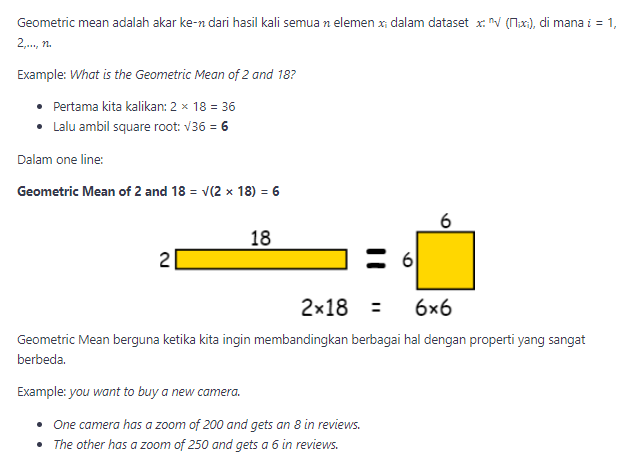
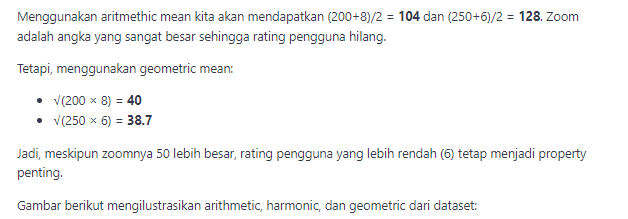
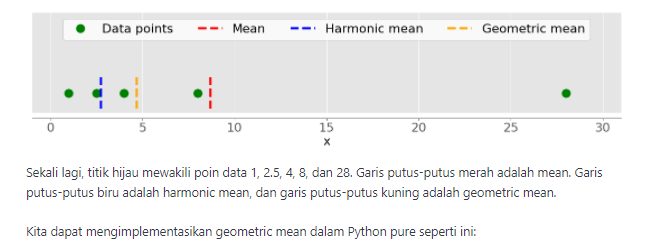

In [19]:
gmean = 1

for item in x:
    gmean *= item
    
gmean **= 1 / len(x)
gmean

4.677885674856041

Kita juga bisa mendapatkan geometric mean dengan scipy.stats.gmean ():

In [20]:
scipy.stats.gmean(y)

4.67788567485604

In [21]:
scipy.stats.gmean(z)

4.67788567485604

### Geometric Mean

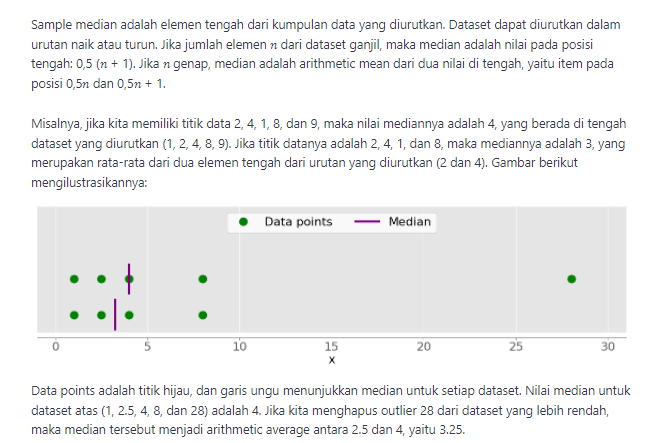
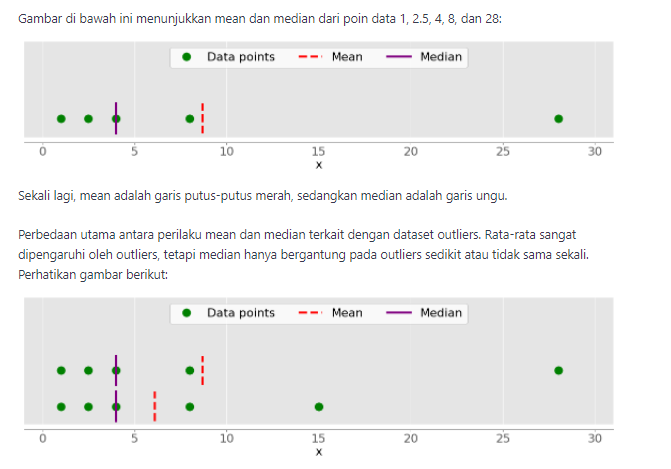
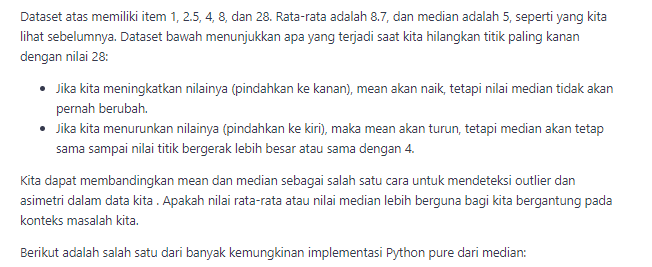

In [22]:
n = len(x)

if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
    
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
    
median_

4

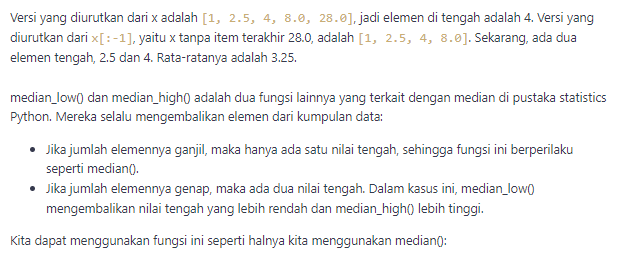

In [23]:
x

[8.0, 1, 2.5, 4, 28.0]

In [24]:
statistics.median_low(x[:-1])

2.5

In [25]:
statistics.median_high(x[:-1])

4

Sekali lagi, versi yang diurutkan dari x[:-1] adalah [1, 2.5, 4, 8.0]. Dua elemen di tengah adalah 2.5 (low) dan 4 (high).

Tidak seperti kebanyakan fungsi lain dari pustaka statistics  Python, median(), median_low(), dan median_high() tidak mengembalikan nan ketika ada nilai nan di antara titik data:

In [26]:
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


Kita juga bisa mendapatkan median dengan np.median ():

In [27]:
median_ = np.median(y)
print(median_)

4.0


In [28]:
median_ = np.median(y[:-1])
print(median_)

3.25


### Mode

Sample mode adalah nilai dalam kumpulan data yang paling sering muncul. Jika tidak ada satu pun nilai tersebut, maka set tersebut multimodal karena memiliki beberapa nilai modal. Misalnya, pada set yang berisi poin 2, 3, 2, 8, dan 12, angka 2 adalah mode karena terjadi dua kali, tidak seperti item lain yang hanya muncul sekali.


In [29]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

Kita bisa mendapatkan mode dengan statistics.mode()

In [30]:
mode_ = statistics.mode(u)
mode_

2

Kita juga bisa mendapatkan mode dengan scipy.stats.mode():

In [31]:
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [32]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

Kita bisa mendapatkan mode dan jumlah kemunculannya sebagai array NumPy dengan dot notation:

In [33]:
print(mode_.mode)
print(mode_.count)

[12]
[3]


Objek Pandas Series memiliki metode .mode() yang menangani nilai multimodal dengan baik dan mengabaikan nilai nan secara default:

In [34]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


Seperti yang kalian lihat, .mode() mengembalikan pd.Series baru yang menampung semua nilai modal. Jika kalian ingin .mode() memperhitungkan nilai nan, cukup teruskan argumen opsional dropna = False.

## Measures of Variability

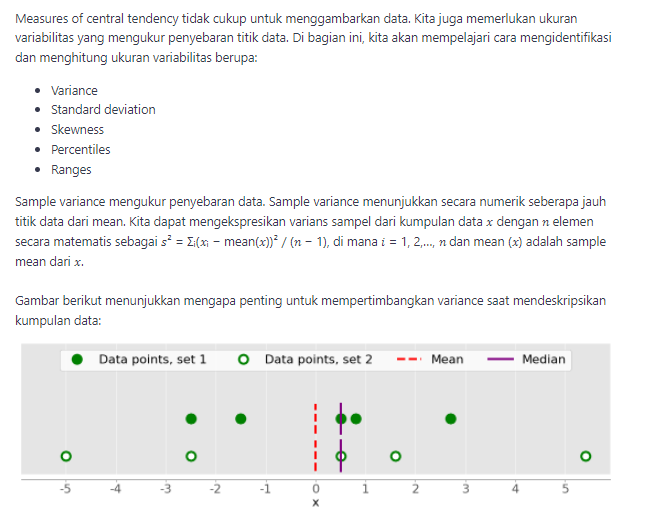
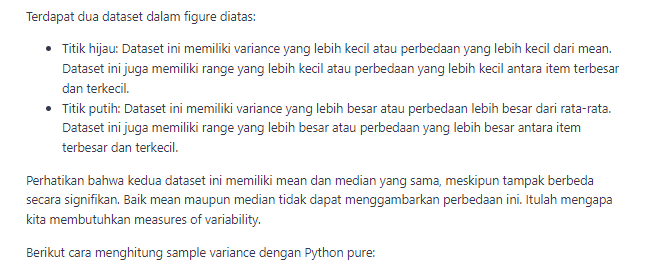

In [35]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

Pendekatan ini cukup dan dapat menghitung sample variance dengan baik. Namun, solusi yang lebih singkat dan lebih elegan adalah dengan memanggil fungsi statistics.variance():

In [36]:
var_ = statistics.variance(x)
var_

123.2

Kita juga dapat menghitung sample variance dengan NumPy. Kita harus menggunakan fungsi np.var() atau method .var():

In [37]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [38]:
var_ = y.var(ddof=1)
var_

123.19999999999999

Sangat penting untuk menentukan parameter ddof = 1. Begitulah cara kita menyetel degrees of freedom ke 1. Parameter ini memungkinkan kalkulasi yang tepat dari 𝑠², dengan (𝑛 - 1) di penyebutnya, bukan 𝑛.

Objek pd.Series memiliki metode .var() yang mengabaikan nilai nan secara default:

In [39]:
z.var(ddof=1)

123.19999999999999

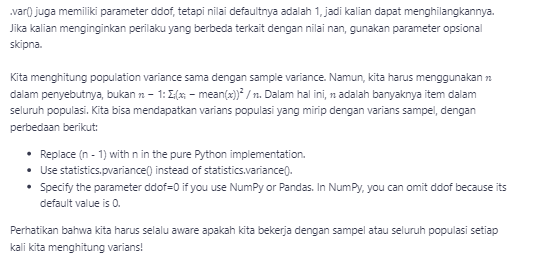

### Standard Deviation

Sample standard deviation adalah cara lain mengukur penyebaran data. Berhubungan dengan varians sampel, karena standard deviation, 𝑠, adalah positive square root dari sample variance. standard deviation seringkali lebih cocok daripada varians karena memiliki satuan yang sama dengan data points. Setelah kita mendapatkan variance, kita dapat menghitung deviasi standar dengan Python pure:

In [40]:
std_ = var_ ** 0.5
std_

11.099549540409285

Meskipun solusi ini berhasil, kita juga dapat menggunakan statistics.stdev():

In [41]:
std_ = statistics.stdev(x)
std_

11.099549540409287

<hr style="height:2px">

In [42]:
np.std(y, ddof=1)

11.099549540409285

In [43]:
y.std(ddof=1)

11.099549540409285

Objek pd.Series juga memiliki method .std() yang mengabaikan nan secara default:

In [44]:
z.std(ddof=1)

11.099549540409285

In [45]:
# Contoh Penerapan SkipNA
z.std(skipna=1)

11.099549540409285

### Skewness

In [46]:
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_**0.5

skew_ = (sum((item - mean_)**3 for item in x)
         * n / ((n - 1) * (n - 2) * std_**3))

In [47]:
skew_

1.9470432273905929

Skewness menunjukan angka positive, jadi x mempunyai right-side tail.

Kita juga dapat menghitung sample skewness dengan <b>scipy.stats.skew()</b>

In [48]:
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [49]:
scipy.stats.skew(y_with_nan, bias=False)

nan

Hasil yang diperoleh sama dengan implementasi Python pure. Parameter bias diset ke False untuk mengaktifkan koreksi bias statistik. Parameter opsional nan_policy dapat menerima nilai 'propagate', 'raise', atau 'omit'. Ini memungkinkan kita untuk mengontrol cara kita menangani nilai nan.

In [50]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [51]:
z_with_nan.skew()

1.9470432273905924

### Percentiles

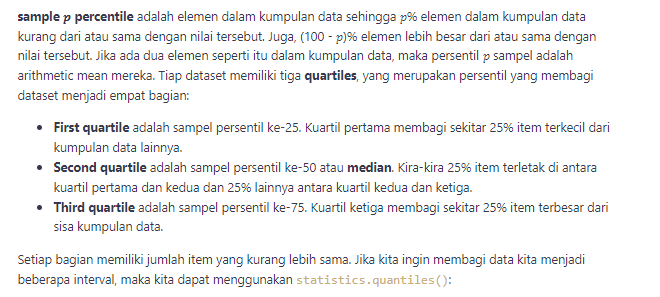

In [52]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n = 2)

[8.0]

In [53]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [54]:
y = np.array(x)
np.percentile(y, 5)

-3.44

In [55]:
np.percentile(y, 95)

34.919999999999995

In [56]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [57]:
np.median(y)

8.0

Kode tersebut menghitung persentil ke-25, ke-50, dan ke-75 sekaligus. Jika nilai persentil adalah sebuah urutan, maka percentile() mengembalikan array NumPy dengan hasilnya. Statement pertama mengembalikan array quartiles. Pernyataan kedua mengembalikan median, sehingga kita dapat mengonfirmasi bahwa itu sama dengan persentil ke-50, yaitu 8.0.

In [58]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [59]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [60]:
np.quantile(y, 0.05)

-3.44

In [61]:
np.quantile(y, 0.95)

34.919999999999995

In [62]:
np.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [63]:
np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

pd.Series objek memiliki method .quantile():

In [64]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [65]:
z.quantile(0.95)

34.919999999999995

In [66]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [67]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

### Ranges

In [68]:
np.ptp(y)

46.0

In [69]:
np.ptp(z)

46.0

In [70]:
np.ptp(y_with_nan)

nan

In [71]:
np.ptp(z_with_nan)

nan

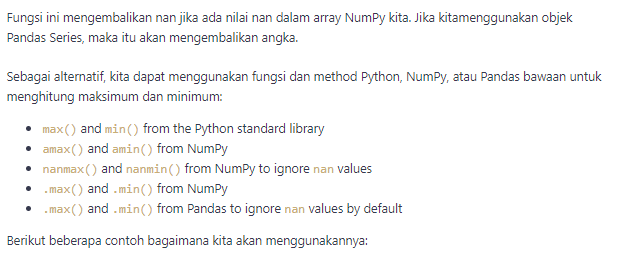

In [72]:
np.amax(y) - np.amin(y)

46.0

In [73]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [74]:
y.max() - y.min()

46.0

In [75]:
z.max() - z.min()

46.0

In [76]:
z_with_nan.max() - z_with_nan.min()

46.0

<b>Interquartile range</b> adalah perbedaan antara kuartil pertama dan ketiga. Setelah kita menghitung kuartil, kita dapat mengambil selisihnya:

In [77]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [78]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

## Summary of Descriptive Statistics

SciPy dan Pandas menawarkan function yang berguna untuk mendapatkan descriptive statistics dengan cepat dengan satu panggilan fungsi atau method. Kita dapat menggunakan scipy.stats.describe() seperti ini:

In [79]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

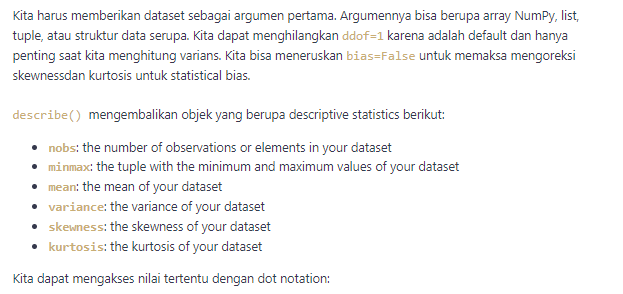

In [80]:
result.nobs

9

In [81]:
# Nilai Min
result.minmax[0]

-5.0

In [82]:
# Nilai Max
result.minmax[1]

41.0

In [83]:
result.mean

11.622222222222222

In [84]:
result.variance

228.75194444444446

In [85]:
result.skewness

0.9249043136685094

In [86]:
result.kurtosis

0.14770623629658886

In [87]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

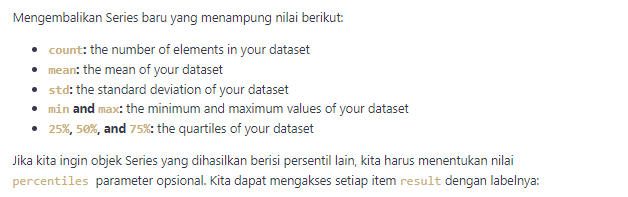

In [88]:
result["mean"]

11.622222222222222

In [89]:
result["std"]

15.12454774346805

In [90]:
result["min"]

-5.0

In [91]:
result["max"]

41.0

In [92]:
result["25%"]

0.1

In [93]:
result["50%"]

8.0

In [94]:
result["75%"]

21.0

## Measures of Correlation Between Pairs of Data

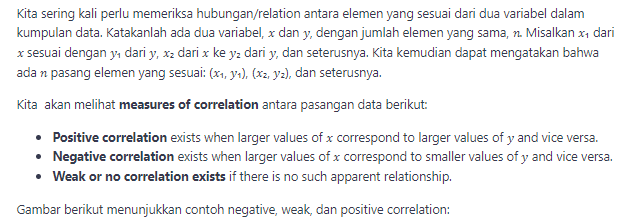
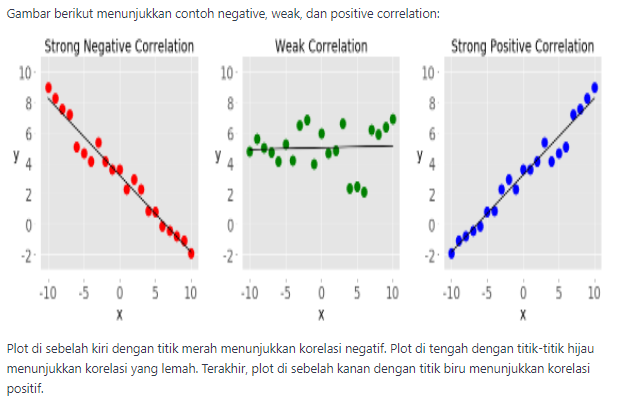
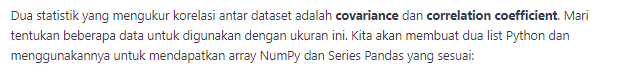

In [95]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x_, y_ = pd.Series(x), pd.Series(y)

### Covariance

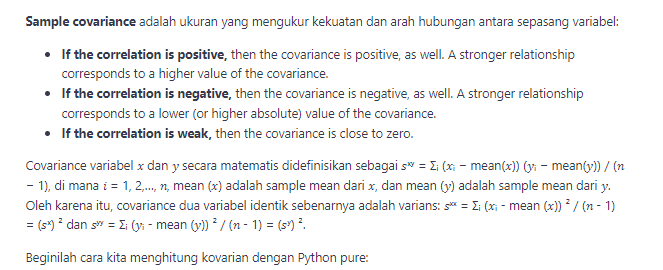

In [96]:
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n

cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))

cov_xy

19.95

In [97]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [98]:
x_.var(ddof=1)

38.5

In [99]:
y_.var(ddof=1)

13.914285714285711

In [100]:
cov_xy = cov_matrix[0, 1]
cov_xy

19.95

In [101]:
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [102]:
cov_xy = x_.cov(y_)
cov_xy

19.95

In [103]:
cov_xy = y_.cov(x_)
cov_xy

19.95

### Correlation Coefficient

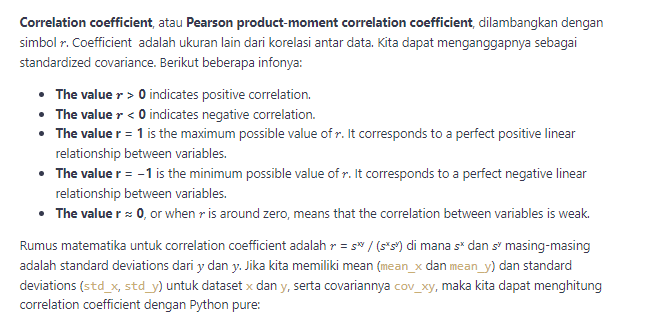

In [104]:
var_x = sum((item - mean_x) ** 2 for itme in x) / (n - 1)
var_y = sum((item - mean_y) ** 2 for itme in y) / (n - 1)

std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)

r

0.030448717948717945

In [105]:
r, p = scipy.stats.pearsonr(x_, y_)
r

0.8619500056316058

In [106]:
p

5.122760847201207e-07

pearsonr() mengembalikan tuple dengan dua angka. Yang pertama adalah 𝑟 dan yang kedua adalah 𝑝-value.

In [107]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [108]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [109]:
r = corr_matrix[1, 0]
r

0.861950005631606

In [110]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

linregress() mengambil x_ dan y_, melakukan regresi linier, dan mengembalikan hasilnya. Slope dan intercept menentukan persamaan regression line, sedangkan rvalue  adalah correlation coefficient. Untuk mengakses nilai tertentu dari hasil linregress(), termasuk correlation coefficient, gunakan dot notation:

In [111]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

Series Pandas memiliki method .corr() untuk menghitung correlation coefficient:

In [112]:
r = x_.corr(y_)
r

0.8619500056316061

In [113]:
r = y_.corr(x_)
r

0.861950005631606

## Working With 2D Data

### Axes

In [114]:
a = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [4, 9, 2],
    [8, 27, 4],
    [16, 1, 1]
])

a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [115]:
np.mean(a)

5.4

In [116]:
a.mean()

5.4

In [117]:
np.median(a)

2.0

In [118]:
a.var(ddof = 1)

53.40000000000001

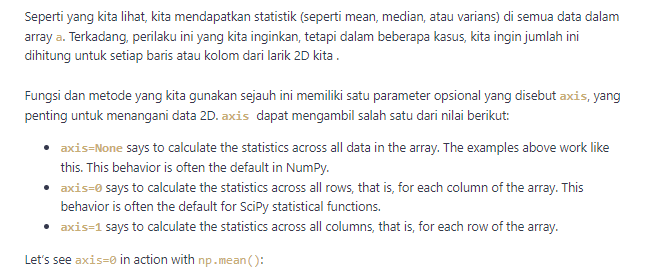

In [119]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [120]:
a.mean(axis = 0)

array([6.2, 8.2, 1.8])

In [121]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [122]:
a.mean(axis = 1)

array([ 1.,  2.,  5., 13.,  6.])

Jika kita memberikan axis=1 pada mean(), kita akan mendapatkan hasil untuk setiap baris:

In [123]:
np.median(a, axis=0)

array([4., 3., 1.])

In [124]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [125]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [126]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [127]:
# Default Axis = 0
scipy.stats.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [128]:
scipy.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [129]:
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [130]:
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [131]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [132]:
# Default Axis = 0
scipy.stats.describe(a, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [133]:
# Axis = 1
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

Kita bisa mendapatkan nilai tertentu dari ringkasan dengan dot notation:

In [134]:
result = scipy.stats.describe(a, axis = 1, ddof = 1, bias = False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

### DataFrames

In [135]:
row_names = ["first", "second", "third", "fourth", "fifth"]
col_names = ["A", "B", "C"]

df = pd.DataFrame(a, index = row_names, columns = col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [136]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [137]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

Apa yang kita dapatkan adalah Series baru yang menyimpan hasil. Dalam hal ini, Series menyimpan mean dan variance untuk setiap kolom. Jika kita menginginkan hasil untuk setiap baris, maka tentukan parameter axis=1

In [138]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [139]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [140]:
df["A"]

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [141]:
df["A"].mean()

6.2

In [142]:
df["A"].var()

37.20000000000001

In [143]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [144]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [145]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [146]:
df.describe().at["mean", "A"]

6.2

In [147]:
df.describe().at["50%", "B"]

3.0

## Visualizing Data (Optional)

In [148]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

### Box Plots

In [149]:
np.random.seed(seed = 0)

x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

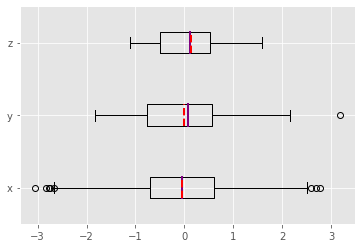

In [150]:
fig, ax = plt.subplots()

ax.boxplot((x, y, z),
    vert = False,
    showmeans = True,
    meanline = True,
    labels = ("x", "y", "z"),
#     path_artist = True,
    medianprops = {
        "linewidth": 2,
        "color": "purple"
    },
    meanprops = {
        "linewidth": 2,
        "color": "red"
    }
)

plt.show()

### Histograms

In [151]:
hist, bind_edges = np.histogram(x, bins = 10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [152]:
bind_edges

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

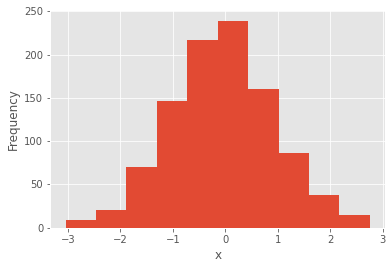

In [153]:
# Kejadian Jika Cumulative bernilai False


fig, ax = plt.subplots()
ax.hist(x, bind_edges, cumulative=False)
ax.set_xlabel("x")
ax.set_ylabel("Frequency")

plt.show()

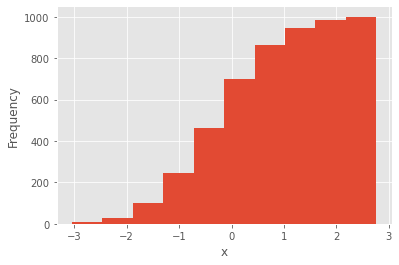

In [154]:
# Kejadian Jika Cumulative bernilai True


fig, ax = plt.subplots()
ax.hist(x, bind_edges, cumulative=True)
ax.set_xlabel("x")
ax.set_ylabel("Frequency")

plt.show()

### Pie Charts

In [155]:
x, y, z = 128, 256, 1024

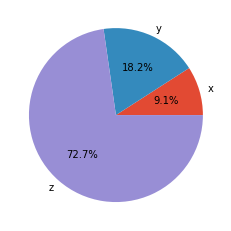

In [156]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=("x", "y", "z"), autopct="%1.1f%%")

plt.show()

### Bar Charts

In [157]:
x = np.arange(21)
y = np.random.randint(21, size = 21)
err = np.random.randn(21)

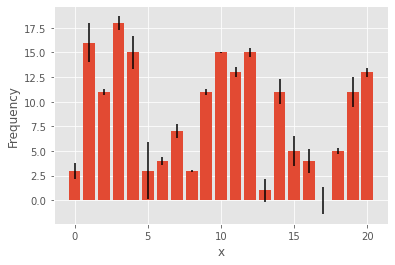

In [158]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel("x")
ax.set_ylabel("Frequency")

plt.show()

### X - Y Plots

In [159]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, * _ = scipy.stats.linregress(x, y)
line = f"Regression line: y = {intercept:.2f} + {slope:.2f}x, r={r:.2f}"

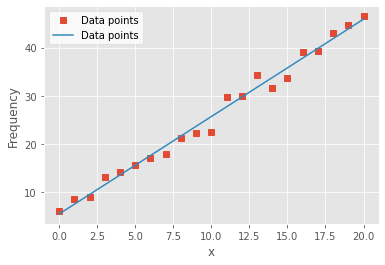

In [160]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth = 0, marker = "s", label = "Data points")
ax.plot(x, intercept + slope * x, label = "Data points")

ax.set_xlabel("x")
ax.set_ylabel("Frequency")
ax.legend(facecolor = "white")

plt.show()

### Heatmaps

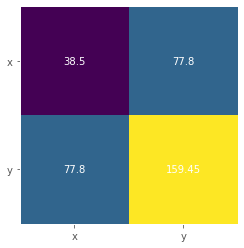

In [161]:
matrix = np.cov(x, y).round(decimals = 2)
fig, ax = plt.subplots()

ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks =(0, 1), ticklabels = ("x", "y"))
ax.yaxis.set(ticks =(0, 1), ticklabels = ("x", "y"))

ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j],
                ha = "center", 
                va = "center",
                color = "w"
               )
        
plt.show()